# <center> <span style= "background:magenta; color:cyan" > Multiple Linear Regression </span></center>

# <span style = "color:orange"> Housing Case Study</span>

### Problem Statement:

Consider a real state company that has a dataset containing the prices of the properties in the Delhi region. It wishes to use the data to optimise the sales prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially the company wants:


- To identify the variable affecting house prices e.g. areas, number of rooms, bathrooms, etc.
- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.
- To know the accuracy of the model, i.e. how well these variable can predict house prices.

### Interpretation is important

#### Steps to follow :
1. Reading, understanding and visualizing the data.
2. Preparing the data for modeling(test-train split, rescaling etc)
3. Training the model.
4. Residual Analysis.
5. Prediction and Evaluation on the test set.

# Step 1: Reading, understanding and visualizing Data

In [528]:
# importing important modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')

In [477]:
# Read the dataset
data = pd.read_csv("housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [478]:
# shape of dataframe
data.shape

(545, 13)

In [479]:
# variable data types with detail
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [480]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


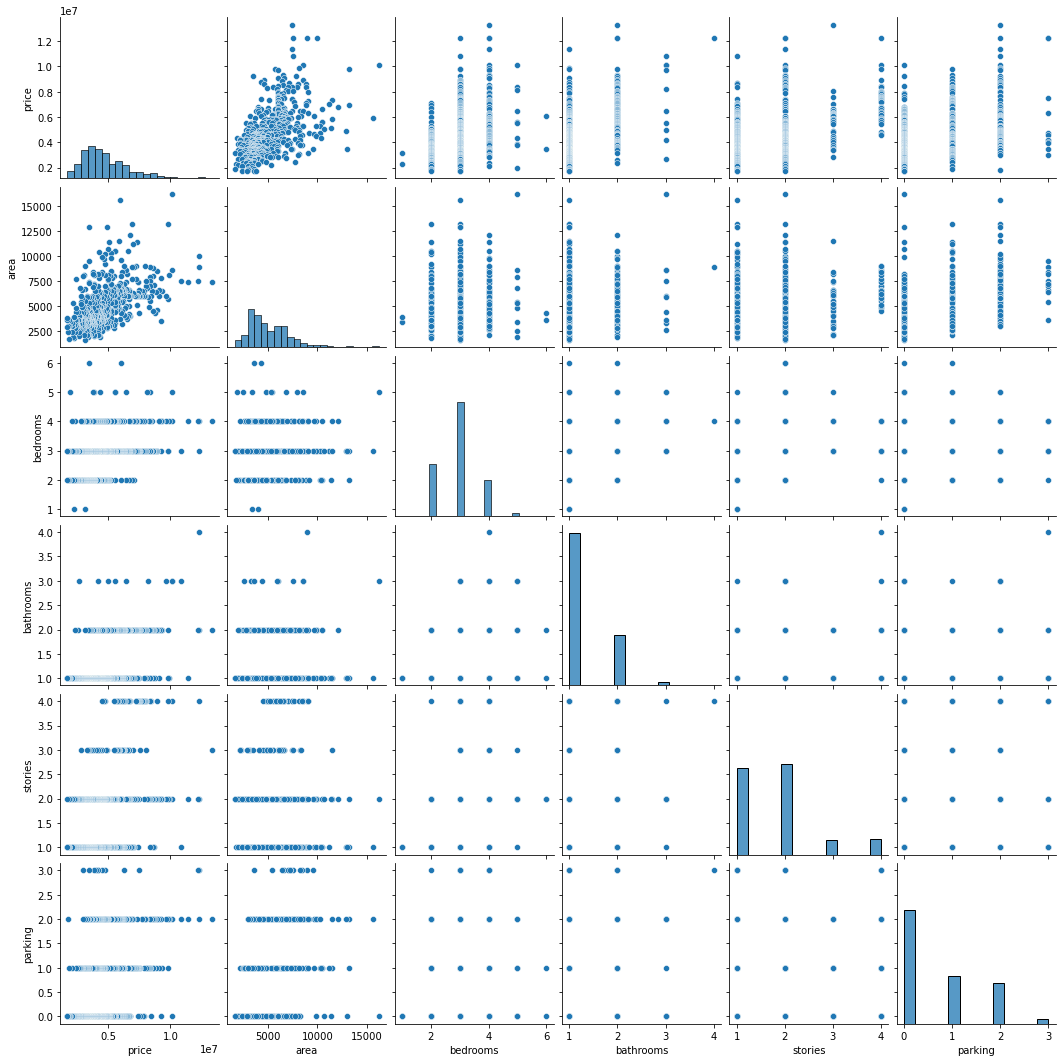

In [481]:
# visualizing the numerical variable in data
sns.pairplot(data)
plt.show()

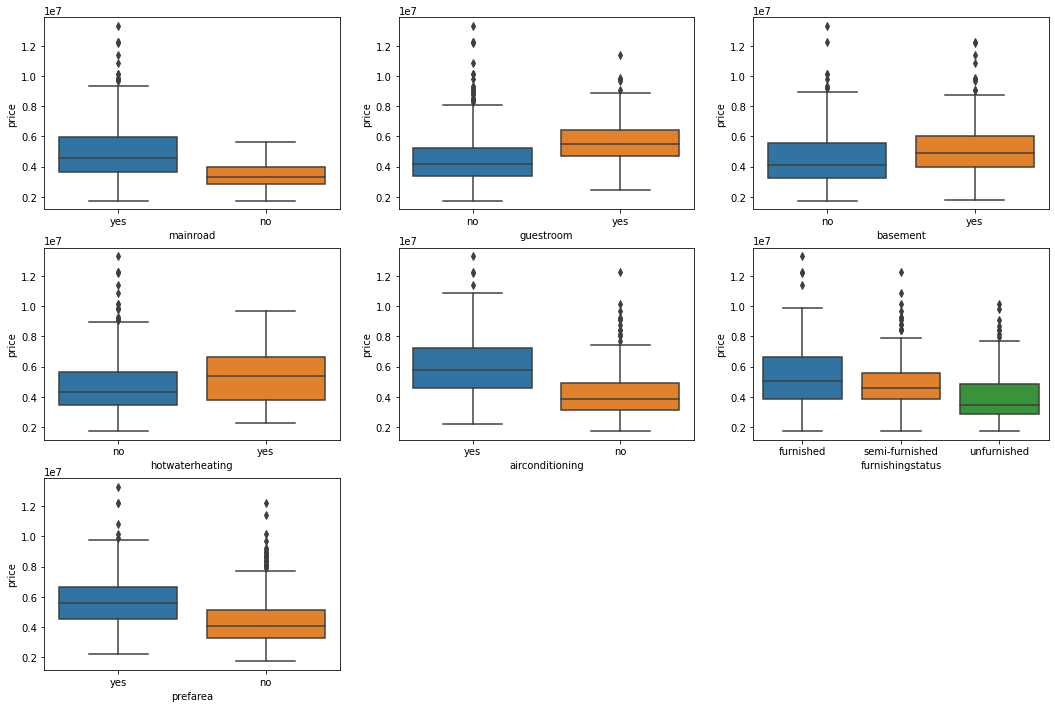

In [482]:
# visualize categorial variables
plt.figure(figsize=(18,12))
plt.subplot(3,3,1)
sns.boxplot(x='mainroad', y='price',data=data)
plt.subplot(3,3,2)
sns.boxplot(x='guestroom', y='price',data=data)
plt.subplot(3,3,3)
sns.boxplot(x='basement', y='price',data=data)
plt.subplot(3,3,4)
sns.boxplot(x='hotwaterheating', y='price',data=data)
plt.subplot(3,3,5)
sns.boxplot(x='airconditioning', y='price',data=data)
plt.subplot(3,3,6)
sns.boxplot(x='furnishingstatus', y='price',data=data)
plt.subplot(3,3,7)
sns.boxplot(x='prefarea', y='price',data=data)
plt.show()

# Step 2: Preparing Data for Modeling

### -  Encoding
- Binary categorical variable to 0/1
- dummy variable for categorical variable

### - Splittting test train set

###  - Rescaling the features(variable)

## Encoding

In [483]:
# Converting Binary categorical variable to 0 and 1
bin_var = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea' ]

# mappping the yes as 1 and no as 0
data[bin_var] = data[bin_var].apply(lambda x : x.map({'yes': 1, 'no': 0}))

In [484]:
# view the variables now
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [485]:
# create dummy variable for 'furnishingstatus'
data= pd.get_dummies(data, columns= ['furnishingstatus'],drop_first = True)

In [486]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [487]:
# Renaming the columns removing the furnishingstatus from variables
data= data.rename(columns={'furnishingstatus_semi-furnished':'semi-furnished', 'furnishingstatus_unfurnished':'unfurnished'})

In [488]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [489]:
data.shape

(545, 14)

In [490]:
# Checking the data now
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            545 non-null    int64
 1   area             545 non-null    int64
 2   bedrooms         545 non-null    int64
 3   bathrooms        545 non-null    int64
 4   stories          545 non-null    int64
 5   mainroad         545 non-null    int64
 6   guestroom        545 non-null    int64
 7   basement         545 non-null    int64
 8   hotwaterheating  545 non-null    int64
 9   airconditioning  545 non-null    int64
 10  parking          545 non-null    int64
 11  prefarea         545 non-null    int64
 12  semi-furnished   545 non-null    uint8
 13  unfurnished      545 non-null    uint8
dtypes: int64(12), uint8(2)
memory usage: 52.3 KB


## Splitting Test Train

In [491]:
df_train, df_test = train_test_split(data, train_size=0.7, random_state= 100)
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


## Rescaling variable
1. MinMax Scaling (normalization) : Between 0 and 1
2. Standardisation (mean-0, sigma-1)

- MinMax Scaling = (X - Xmin)/(Xmax - Xmin)
- Standardization = (X-mean)/sigma

Using MinMax Scaling

In [492]:
# Create an object of the Class
scaler = MinMaxScaler()

# Create a list of variables that need to be performed
num_var = ['price', 'area', 'bathrooms','bedrooms', 
           'stories', 'parking' ]

# Fit the class
df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [493]:
# fit() :  train
# transform() : test
# fit_transform()

# We always fit on train dataset , never on test dataset as test dataset is unknown to us
# We always use transform on test dataset

In [494]:
# displaying the training data
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [495]:
df_train[num_var].describe()

,price,area,bathrooms,bedrooms,stories,parking
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.136483,0.386352,0.268591,0.242345
std,0.157607,0.181420,0.237325,0.147336,0.295001,0.285933
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.000000,0.200000,0.000000,0.000000
50%,0.221212,0.234424,0.000000,0.400000,0.333333,0.000000
75%,0.345455,0.398099,0.500000,0.400000,0.333333,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 3: Training the model

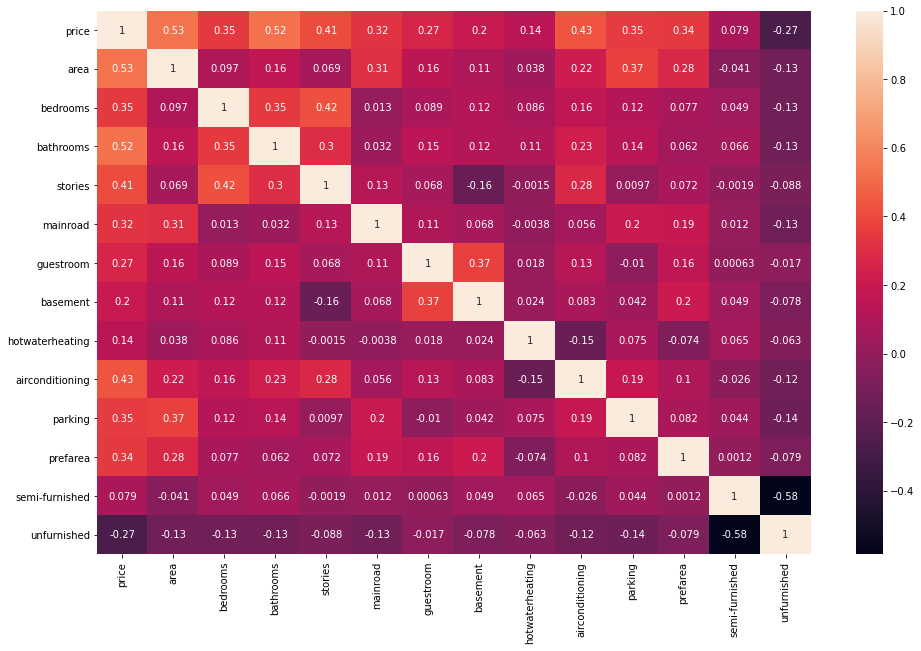

In [496]:
# Heatmap
plt.figure(figsize = (16,10))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

In [497]:
# X_train, y_train
y_train = df_train.pop('price')
X_train = df_train

 -significance of variables
 
 -VIF

In [498]:
# add a constant
X_train_sm = sm.add_constant(X_train['area'])

# Create 1st model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

In [499]:
# Params
lr_model.params

const    0.126894
area     0.462192
dtype: float64

In [500]:
# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           3.15e-29
Time:                        22:56:23   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [501]:
# add another variable bathrooms
X_train_sm = X_train[['area','bathrooms']]
X_train_sm = sm.add_constant(X_train_sm)

# Create 2nd model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

In [502]:
lr_model.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [503]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           2.51e-54
Time:                        22:56:23   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [504]:
# add new Variable bedrooms
X_train_sm = sm.add_constant(X_train[['area','bathrooms','bedrooms']])

# Create 3rd model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

In [505]:
lr_model.params

const        0.041352
area         0.392211
bathrooms    0.259978
bedrooms     0.181863
dtype: float64

In [506]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           3.12e-57
Time:                        22:56:23   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Adding All variables to the model

In [507]:
# Build model with all the variables
X_train_sm = sm.add_constant(X_train)

# Create model with all variables
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

In [508]:
lr_model.params

const              0.020033
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64

In [509]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           8.83e-83
Time:                        22:56:23   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [510]:
# significance variable(p-value)
# VIF

# VIF

In [511]:
# create vif dataframe with all the vif of the variables that are in the model
vif  = pd.DataFrame()
vif['Varaibles'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Varaibles,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


We could have

**1. High p-value and High vif**

**2. High-Low**

  - high p-value low vif : remove this first
  - low p-value high vif : remove this after ones above
  
**3. Low p-value and Low vif**


In [512]:
# removing semi-furnished variable as it has high p-value
X = X_train.drop('semi-furnished', axis=1)

In [513]:
# now building model after removing one variable
X_train_sm = sm.add_constant(X)

# Create model with remaining variables
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

In [514]:
lr_model.params

const              0.020740
area               0.234404
bedrooms           0.046710
bathrooms          0.190876
stories            0.108475
mainroad           0.050401
guestroom          0.030447
basement           0.021605
hotwaterheating    0.084890
airconditioning    0.066803
parking            0.060761
prefarea           0.059419
unfurnished       -0.031594
dtype: float64

In [515]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           1.07e-83
Time:                        22:56:24   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [516]:
# now looking at vif values
vif  = pd.DataFrame()
vif['Varaibles'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Varaibles,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


In [517]:
# remove bedrooms variable
X = X.drop('bedrooms', axis=1)


In [518]:
# building model without bedrooms now
X_train_sm = sm.add_constant(X)

# Create model with remaining variables
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

In [519]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           2.73e-84
Time:                        22:56:24   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [520]:
# looking at vif
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Variable,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


- This is the final model now as no variable need to be removed now

# Step 4: Residual Analysis

In [521]:
# prediction y_train on train model
y_train_pred = lr_model.predict(X_train_sm)

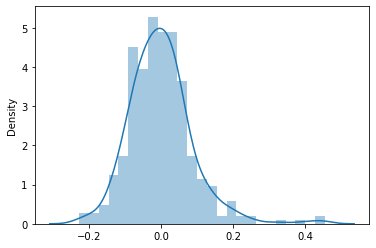

In [522]:
# checking error terms are normally distributed 
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

# Step 5: Prediction and Evaluation on the test set

In [523]:
# transform the test set
df_test[num_var] = scaler.transform(df_test[num_var])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [524]:
y_test = df_test.pop('price')
X_test = df_test

In [525]:
# add constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,1.0,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,1.0,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,1.0,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,1.0,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,1.0,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [526]:
# drop variables
X_test_sm = X_test_sm.drop(['bedrooms','semi-furnished'], axis =1)

In [527]:
# Make prediction
y_test_pred = lr_model.predict(X_test_sm)

In [529]:
# Evaluate the model
r2_score(y_test, y_test_pred)

0.6713505684480789

In [530]:
# check r2 on train
r2_score(y_train, y_train_pred)

0.6800930630265903

### Our Equation 
**$Price = 0.0357 + 0.2347 \times area + 0.1965 \times bathrooms + 0.1178 \times stories + 0.0488 \times mainroad
+ 0.0301 \times guestroom + 0.0239 \times basement + 0.0864 \times hotwaterheating + 0.0665 \times airconditioning 
+ 0.0629 \times parking + 0.0596 \times prefarea - 0.0323 \times unfurnished$** 
